In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'


path = "C:/Users/ramki/Downloads/college project/"
accidents= pd.read_csv( path + "Accidents0515.csv",index_col='Accident_Index' )
vehicles= pd.read_csv( path + "Vehicles0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False )
casualties= pd.read_csv( path + "Casualties0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False )
print ("The dataset has %d rows and %d columns" % (accidents.shape[0] , accidents.shape[1]))

accidents.head()


The dataset has 1780653 rows and 31 columns


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [2]:
accidents = accidents.join(vehicles, how='outer')

In [3]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

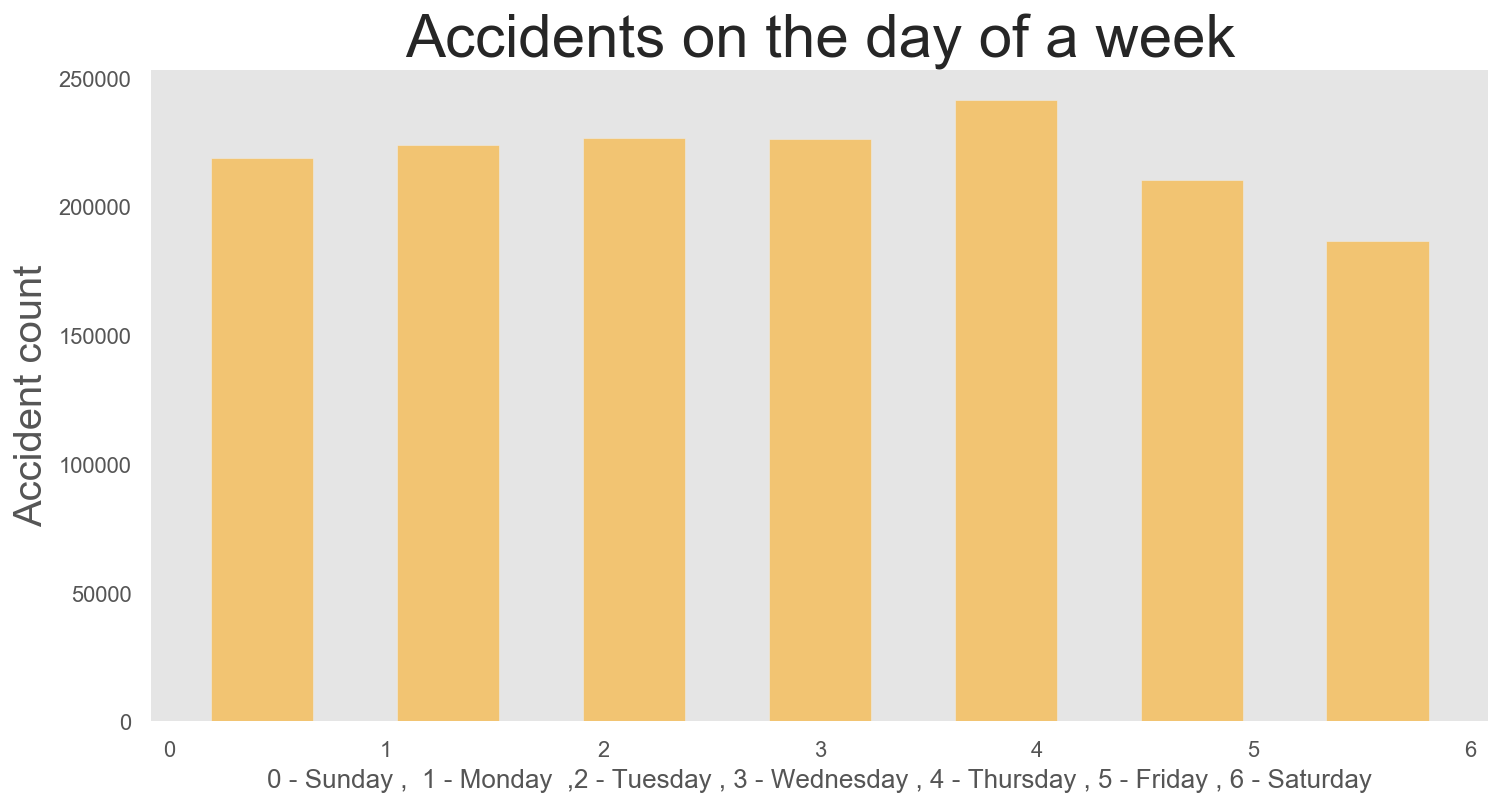

In [65]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0, 0.5, 'Accident count')

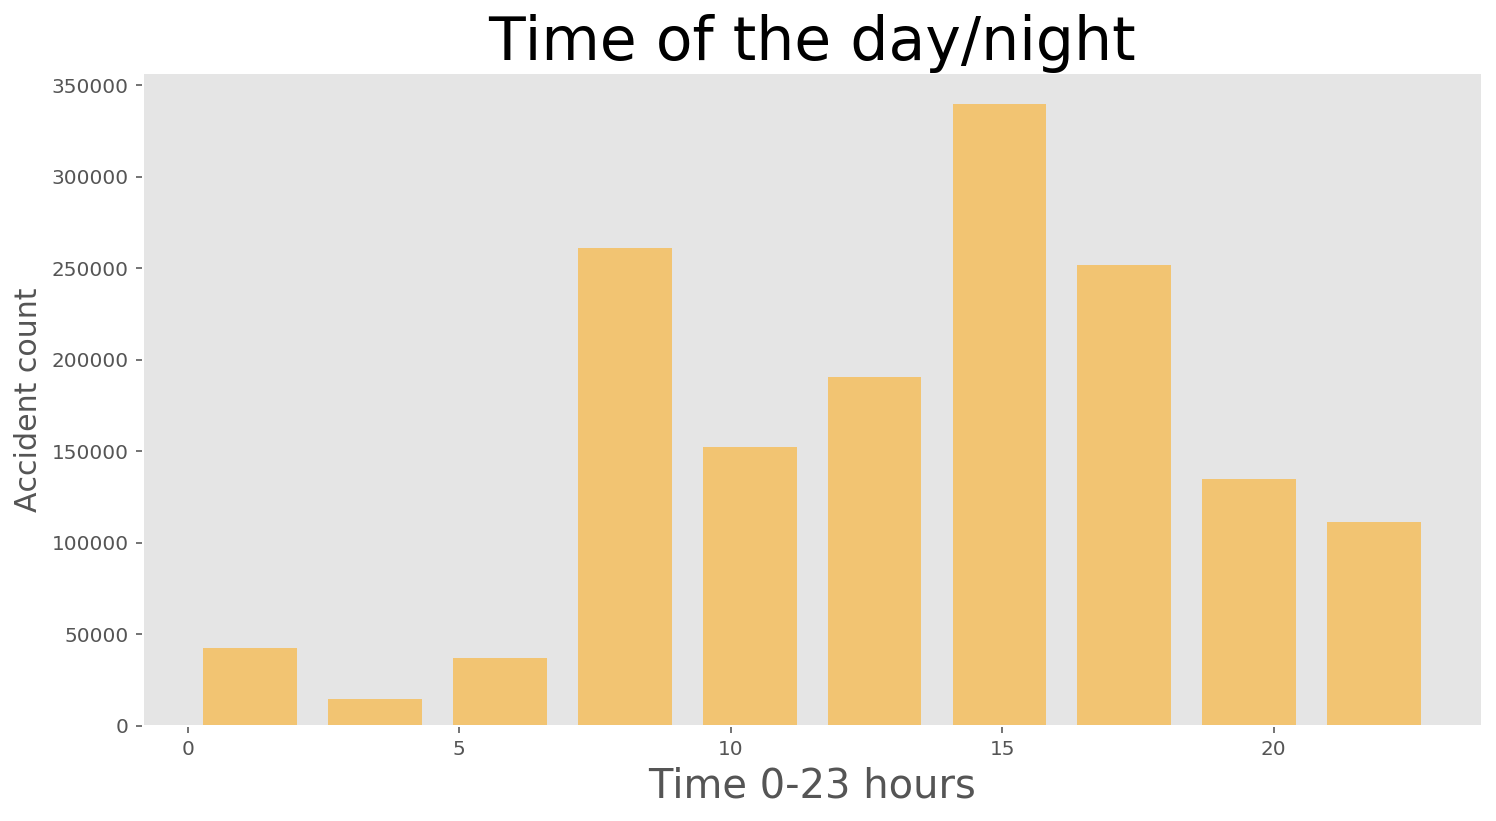

In [5]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

Text(0.5, 0, 'Age of Drivers')

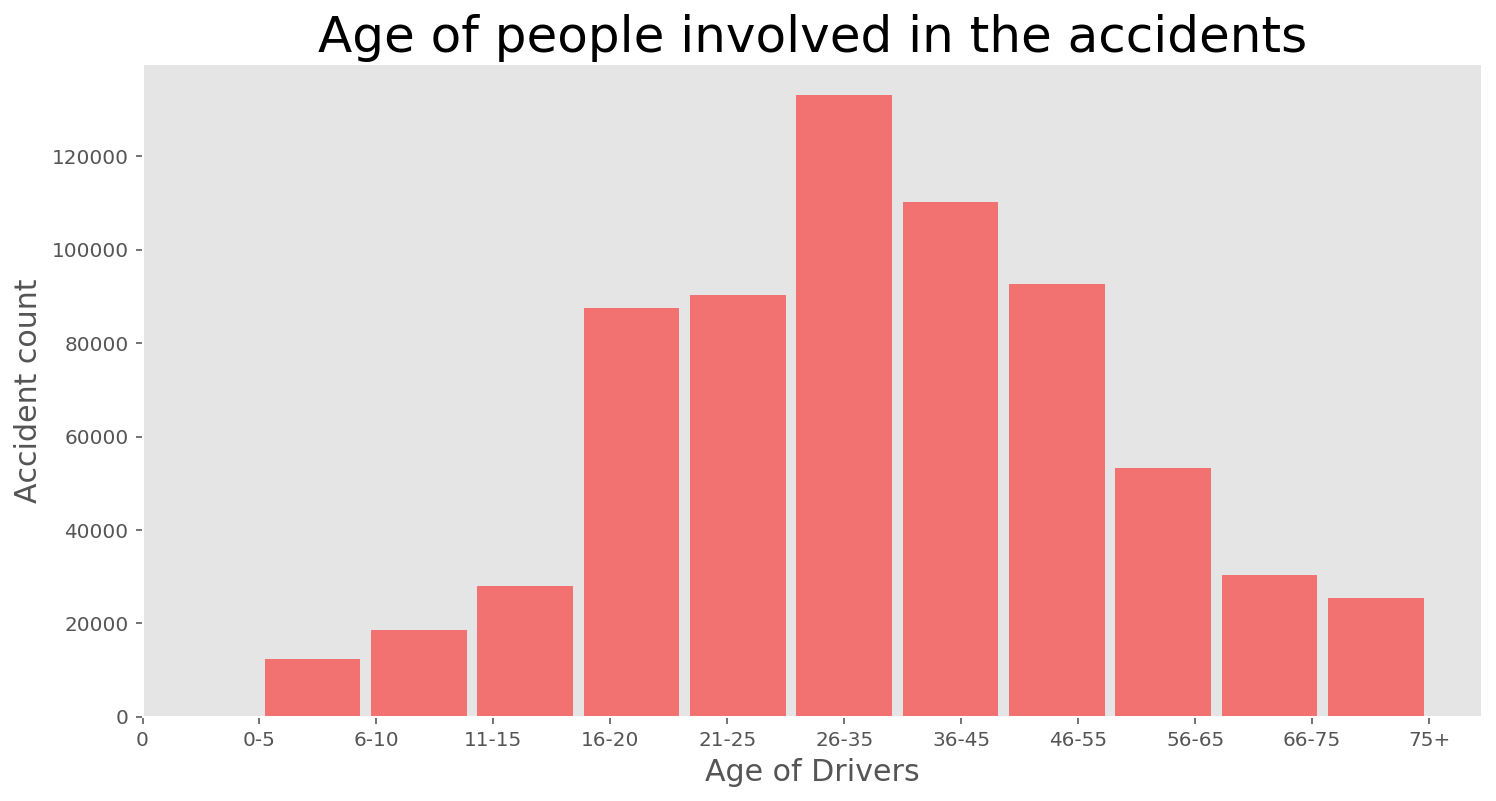

In [6]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

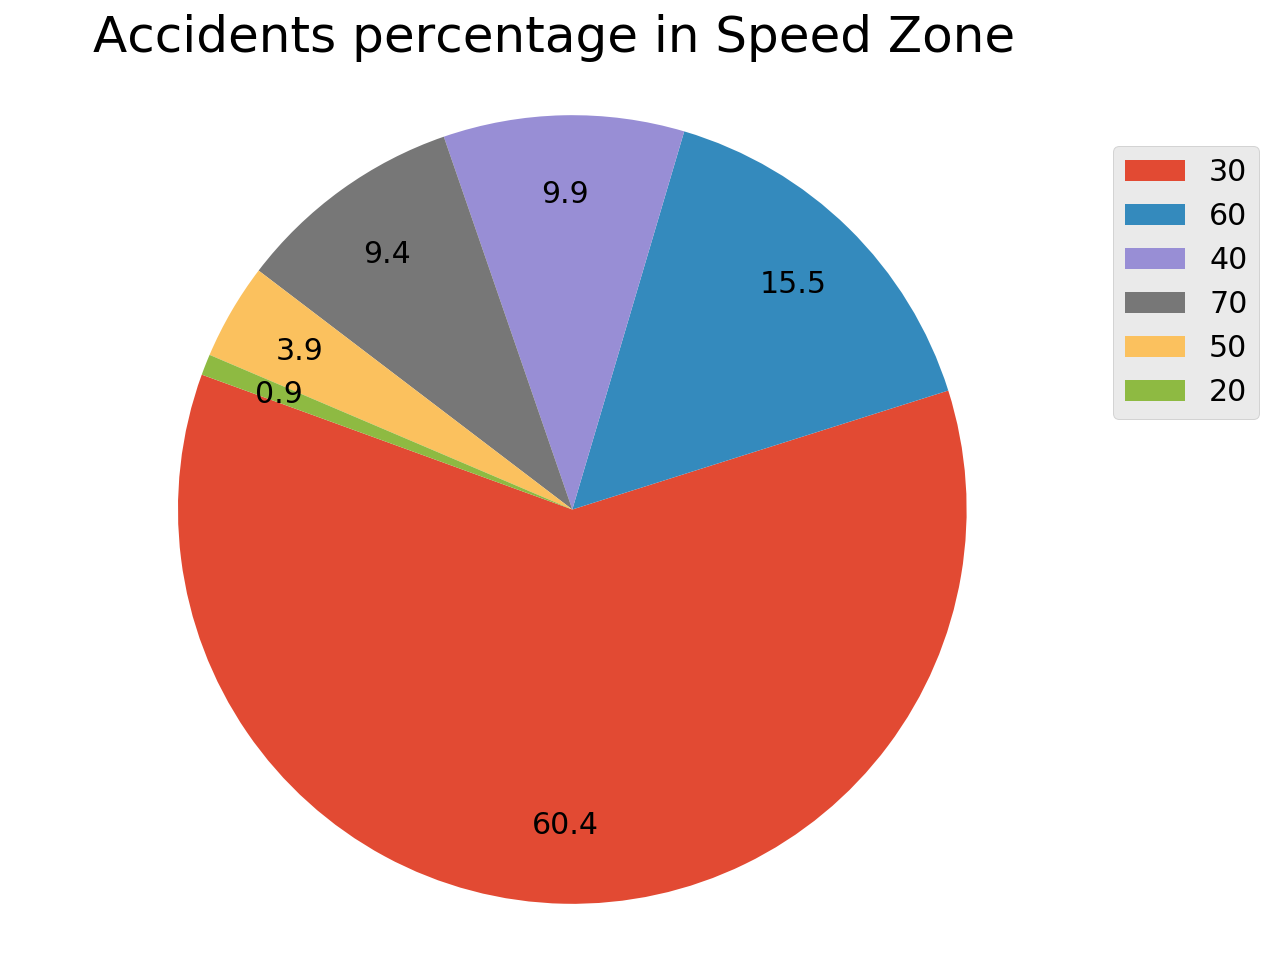

In [4]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

In [5]:
casualties = casualties[casualties.Sex_of_Casualty != -1]

In [6]:
def map_sex(sex):
    if sex == 1:
        return 'Male'
    elif sex == 2:
        return 'Female'

casualties['Sex_of_Casualty'] = casualties['Sex_of_Casualty'].apply(map_sex)

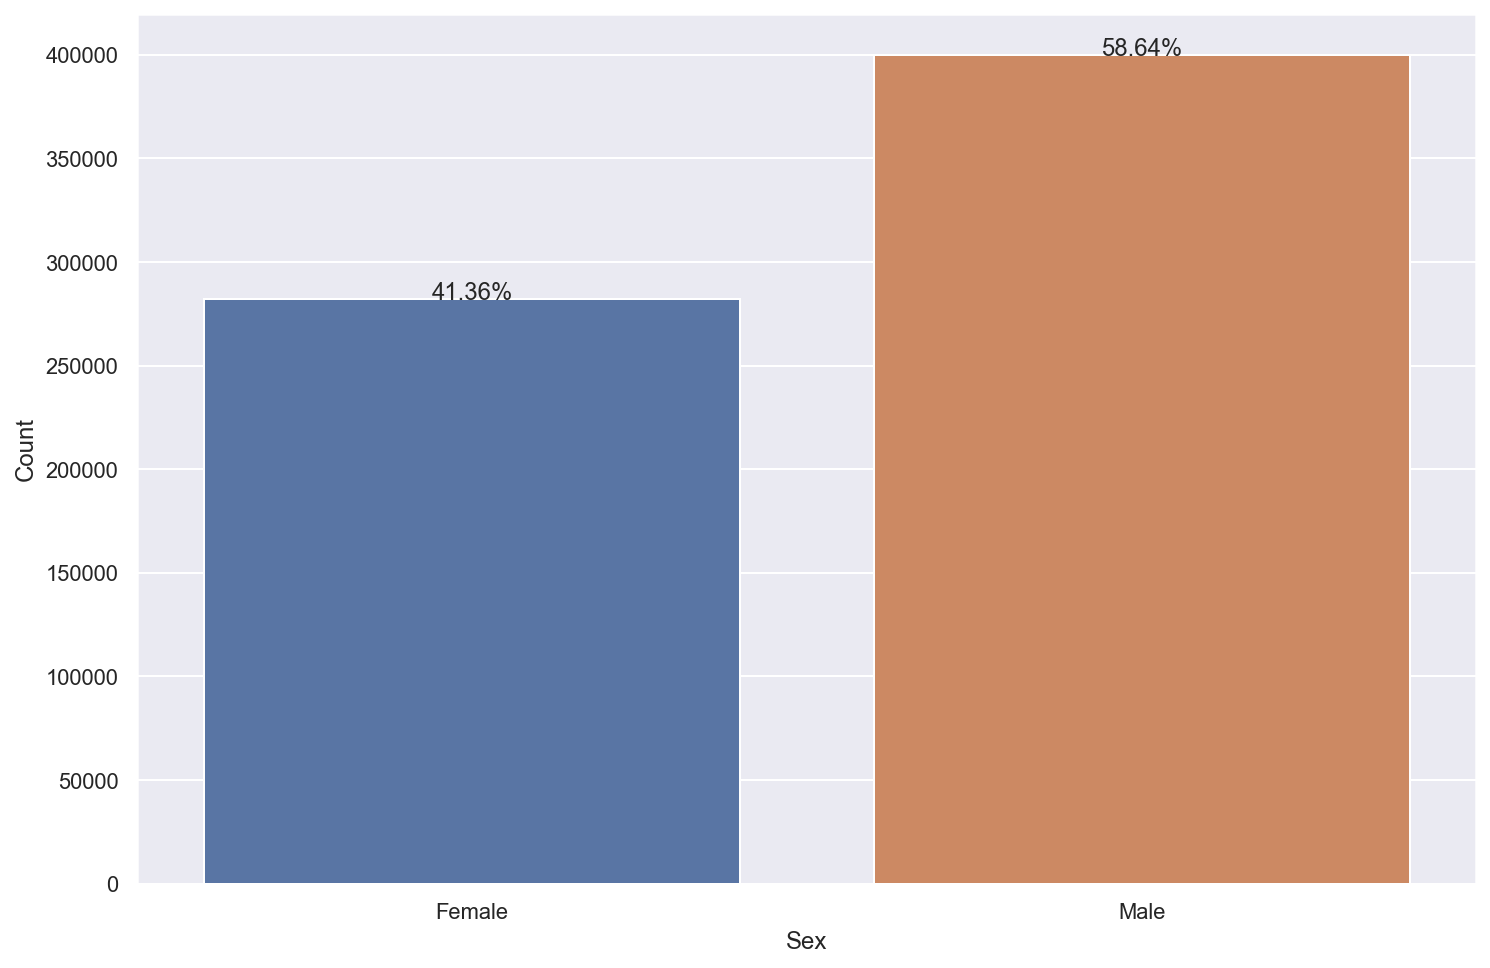

In [68]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
genderplot = sns.countplot(x='Sex_of_Casualty',data=casualties)
genderplot.set(xlabel='Sex', ylabel='Count')
for p in genderplot.patches: 
    height = p.get_height() 
    genderplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(casualties))*100)+'%',  
      ha="center")

In [4]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
X_train.shape,y_train.shape

((1227833, 11), (1227833,))

In [16]:
X_test.shape,y_test.shape

((306959, 11), (306959,))

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import classification_report

In [26]:
cm

array([[     0,      0,   4111],
       [     0,      0,  38151],
       [     1,      0, 264696]], dtype=int64)

In [9]:
print("  precision_score:",precision_score(y_test, y_pred,average='micro'))

  precision_score: 0.8623171172697331


In [10]:
logisticaccuracy = round(classifier.score(X_test, y_test) * 100, 2)
print("Accuracy" , logisticaccuracy)

Accuracy 86.23


In [76]:
print("LogisticRegression  f1_score: ",f1_score(y_test, y_pred, average='micro'))

LogisticRegression  f1_score:  0.8623171172697331


In [77]:
print("  recall_score:",recall_score(y_test, y_pred,average='micro'))

  recall_score: 0.8623171172697331


In [87]:
print("  precision_score:",precision_score(y_test, y_pred,average='micro'))

  precision_score: 0.8623073439775345


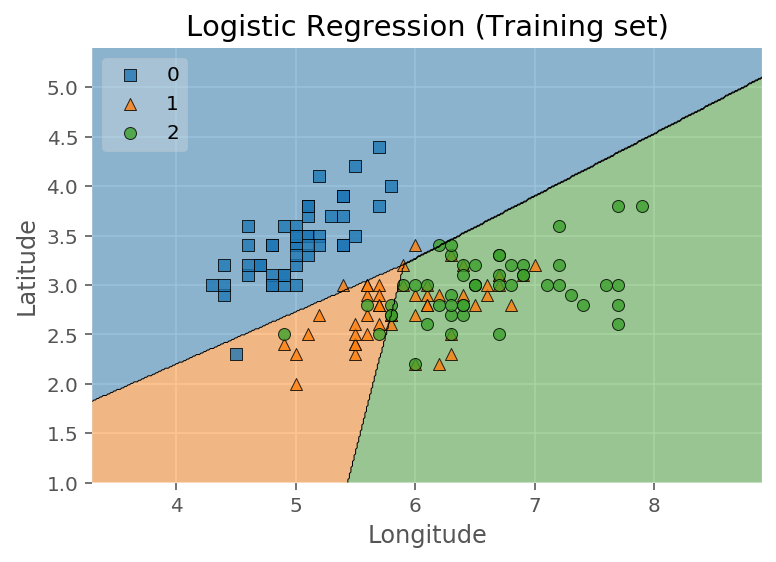

In [13]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)


plot_decision_regions(X,y,clf = classifier,legend = 2)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [15]:
y_pred = classifier.predict(X)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)

In [17]:
cm

array([[49,  1,  0],
       [ 2, 21, 27],
       [ 1,  4, 45]], dtype=int64)

In [18]:
print("  precision_score:",precision_score(y, y_pred,average='micro'))

  precision_score: 0.7666666666666667


In [19]:
logisticaccuracy = round(classifier.score(X, y) * 100, 2)
print("Accuracy" , logisticaccuracy)

Accuracy 76.67


In [20]:
print("LogisticRegression  f1_score: ",f1_score(y, y_pred, average='micro'))

LogisticRegression  f1_score:  0.7666666666666667


In [22]:
print("  recall_score:",recall_score(y, y_pred,average='micro'))

  recall_score: 0.7666666666666667


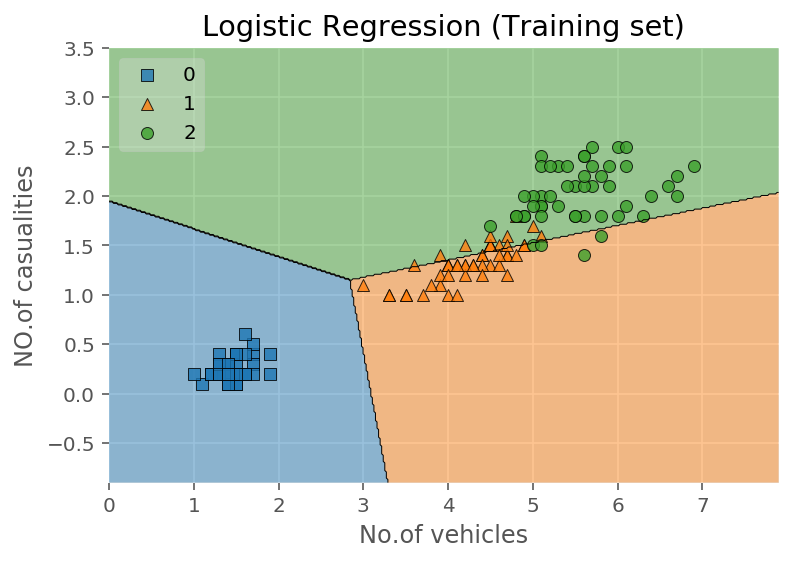

In [46]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[2,3]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)


plot_decision_regions(X,y,clf = classifier,legend = 2)
plt.title('Logistic Regression (Training set)')
plt.xlabel('No.of vehicles')
plt.ylabel('NO.of casualities')

plt.show()

In [24]:
y_pred = classifier.predict(X)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)

In [26]:
cm

array([[50,  0,  0],
       [ 0, 35, 15],
       [ 0,  4, 46]], dtype=int64)

In [29]:
print("  precision_score:",precision_score(y, y_pred,average='micro'))

  precision_score: 0.8733333333333333


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [93]:
cm

array([[     0,      0,   4111],
       [     0,      0,  38151],
       [     4,      0, 264693]], dtype=int64)

In [94]:
logisticaccuracy = round(rand.score(X_test, y_test) * 100, 2)
print("Accuracy" , logisticaccuracy)

Accuracy 84.62


In [95]:
print("  precision_score:",precision_score(y_test, y_pred,average='micro'))

  precision_score: 0.8623073439775345


In [96]:
print("  recall_score:",recall_score(y_test, y_pred,average='micro'))

  recall_score: 0.8623073439775345


In [97]:
print("RandomForestClassification  f1_score: ",f1_score(y_test, y_pred, average='micro'))

RandomForestClassification  f1_score:  0.8623073439775345


In [15]:
Y_pred = randomforest.predict(X_test)

In [18]:
acc_random_forest1 = round(randomforest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.62
              precision    recall  f1-score   support

           1   0.060784  0.007541  0.013417      4111
           2   0.233434  0.056512  0.090995     38151
           3   0.866567  0.973018  0.916713    264697

    accuracy                       0.846178    306959
   macro avg   0.386929  0.345690  0.340375    306959
weighted avg   0.777085  0.846178  0.801989    306959



Predicted,1,2,3,All
Actual,,,,
1,31,314,3766,4111
2,103,2156,35892,38151
3,376,6766,257555,264697
All,510,9236,297213,306959


In [58]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
randomforest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
Y_pred = randomforest.predict(X)

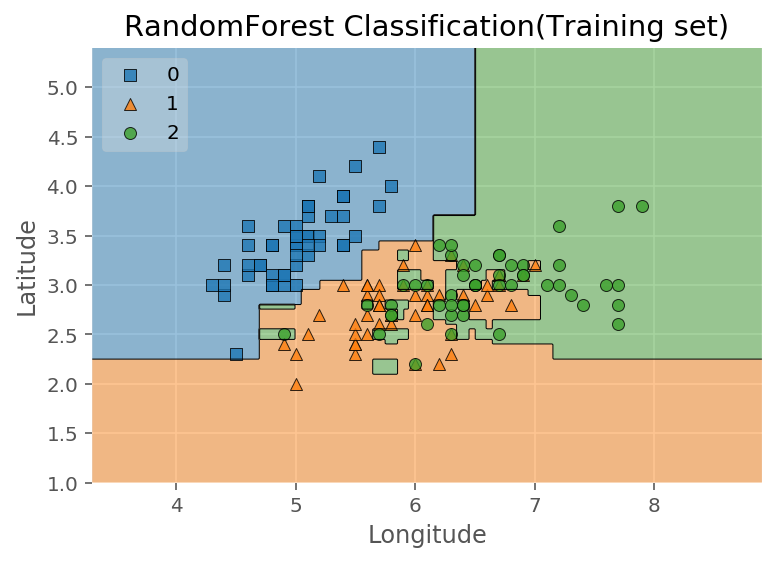

In [60]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X,y,clf = randomforest,legend = 2)
plt.title('RandomForest Classification(Training set)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [61]:
acc_random_forest1 = round(randomforest.score(X, y) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 92.0
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        50
           1   0.880000  0.880000  0.880000        50
           2   0.880000  0.880000  0.880000        50

    accuracy                       0.920000       150
   macro avg   0.920000  0.920000  0.920000       150
weighted avg   0.920000  0.920000  0.920000       150



Predicted,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,44,6,50
2,0,6,44,50
All,50,50,50,150


In [63]:
from sklearn.tree import DecisionTreeClassifier
decisionclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisionclassifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

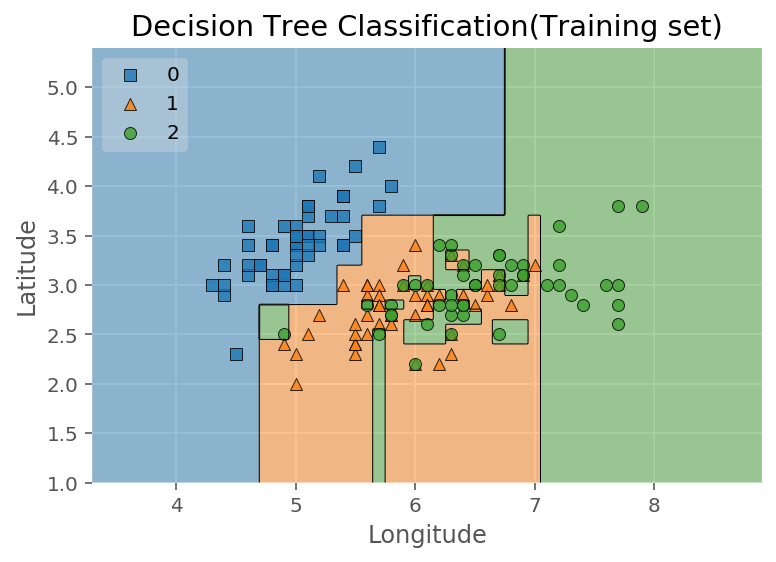

In [67]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X,y,clf = decisionclassifier,legend = 2)
plt.title('Decision Tree Classification(Training set)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [68]:
acc_random_forest1 = round(decisionclassifier.score(X, y) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 92.67
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        50
           1   0.880000  0.880000  0.880000        50
           2   0.880000  0.880000  0.880000        50

    accuracy                       0.920000       150
   macro avg   0.920000  0.920000  0.920000       150
weighted avg   0.920000  0.920000  0.920000       150



Predicted,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,44,6,50
2,0,6,44,50
All,50,50,50,150


In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 75.32
              precision    recall  f1-score   support

           1   0.037788  0.046704  0.041775      4111
           2   0.159713  0.188226  0.172801     38151
           3   0.871223  0.845612  0.858226    264697

    accuracy                       0.753208    306959
   macro avg   0.356241  0.360181  0.357601    306959
weighted avg   0.771629  0.753208  0.762102    306959



Predicted,1,2,3,All
Actual,,,,
1,192,860,3059,4111
2,944,7181,30026,38151
3,3945,36921,223831,264697
All,5081,44962,256916,306959


In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
acc_decision_tree1 = round(classifier.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.9
              precision    recall  f1-score   support

           1   0.049404  0.103868  0.066959      4111
           2   0.263540  0.014285  0.027102     38151
           3   0.866004  0.969229  0.914714    264697

    accuracy                       0.838952    306959
   macro avg   0.392983  0.362461  0.336258    306959
weighted avg   0.780189  0.838952  0.793041    306959



Predicted,1,2,3,All
Actual,,,,
1,427,85,3599,4111
2,1509,545,36097,38151
3,6707,1438,256552,264697
All,8643,2068,296248,306959


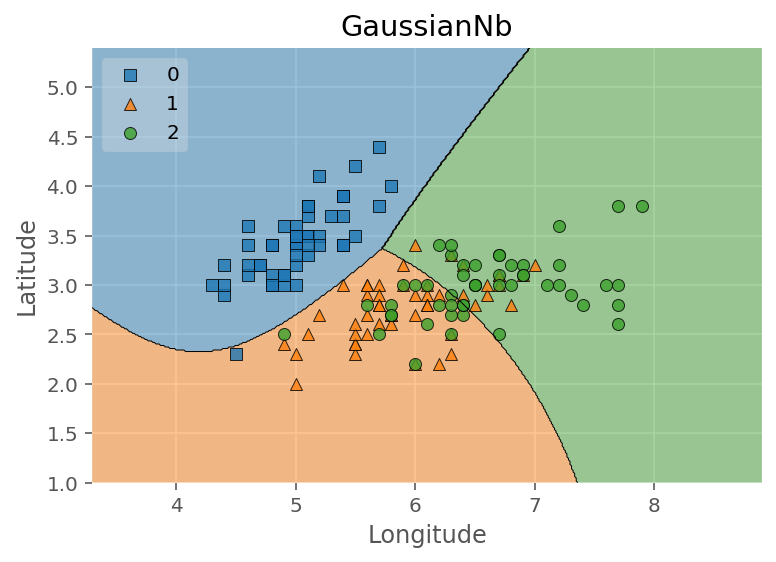

In [17]:
from sklearn import datasets
classifier.fit(X, y)
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions



plot_decision_regions(X,y,clf = classifier,legend = 2)
plt.title('GaussianNb')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [15]:
Y_pred = classifier.predict(X)
acc_decision_tree1 = round(classifier.score(X, y) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.0
              precision    recall  f1-score   support

           0   1.000000  0.980000  0.989899        50
           1   0.649123  0.740000  0.691589        50
           2   0.704545  0.620000  0.659574        50

    accuracy                       0.780000       150
   macro avg   0.784556  0.780000  0.780354       150
weighted avg   0.784556  0.780000  0.780354       150



Predicted,0,1,2,All
Actual,,,,
0,49,1,0,50
1,0,37,13,50
2,0,19,31,50
All,49,57,44,150


In [4]:
accidents.drop(['Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area',
                'Special_Conditions_at_Site' ,'Carriageway_Hazards'], axis=1, inplace=True)

In [10]:
accidents.drop(['Day_of_Week', '1st_Road_Class','Police_Force',
                'Local_Authority_(Highway)' ,'Local_Authority_(District)', 'Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Propulsion_Code','Driver_Home_Area_Type','Number_of_Vehicles'], axis=1, inplace=True)

In [13]:
accidents.drop(['1st_Road_Number', 'Road_Type','Number_of_Casualties',
                'Latitude' ,'Longitude','Junction_Detail','2nd_Road_Number','Light_Conditions'], axis=1, inplace=True)

In [15]:
accidents.drop(['Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident','Date_time','Vehicle_Reference','Vehicle_Type','Towing_and_Articulation','Vehicle_Manoeuvre'], axis=1, inplace=True)

In [17]:
accidents.drop(['Vehicle_Location-Restricted_Lane','Junction_Location'], axis=1, inplace=True)

In [19]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[1,2]]

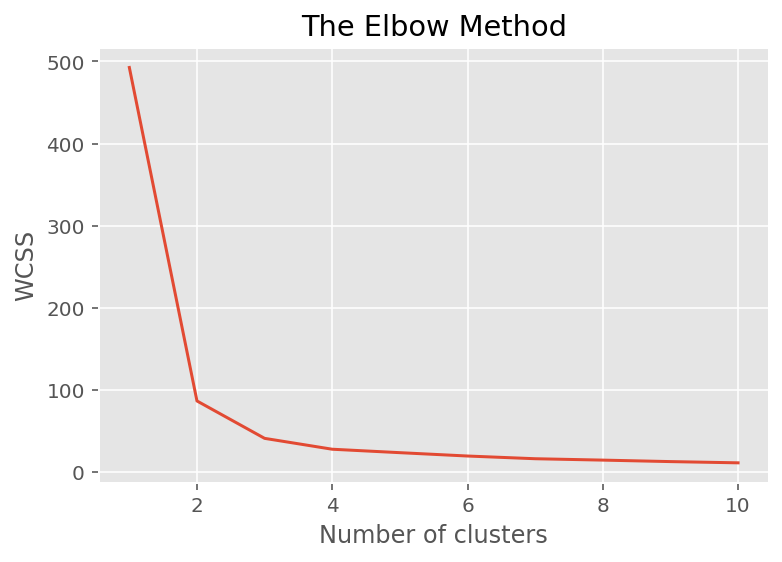

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [24]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

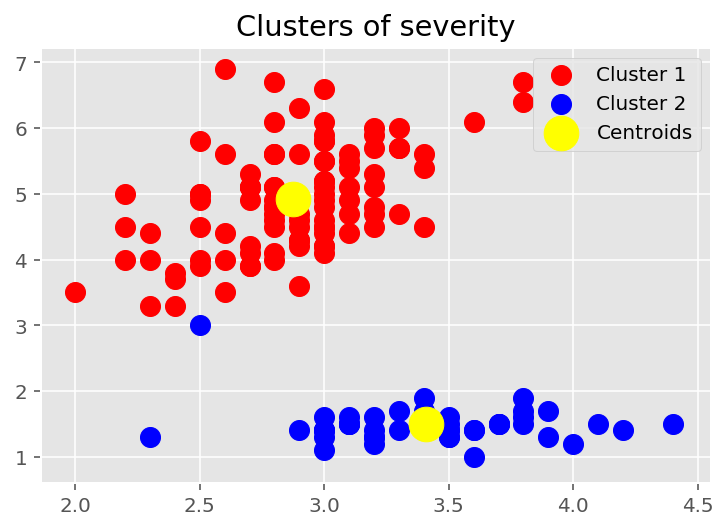

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of severity')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [28]:
Y_pred = kmeans.predict(X)
acc_decision_tree1 = round(kmeans.score(X, y_kmeans) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_kmeans, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_kmeans, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy -8631.06
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        99
           1   1.000000  1.000000  1.000000        51

    accuracy                       1.000000       150
   macro avg   1.000000  1.000000  1.000000       150
weighted avg   1.000000  1.000000  1.000000       150



Predicted,0,1,All
Actual,,,
0,99,0,99
1,0,51,51
All,99,51,150


In [30]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[1,2]]
target = accidents['Accident_Severity']
y= iris.target

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
randomforest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y_pred = randomforest.predict(X)

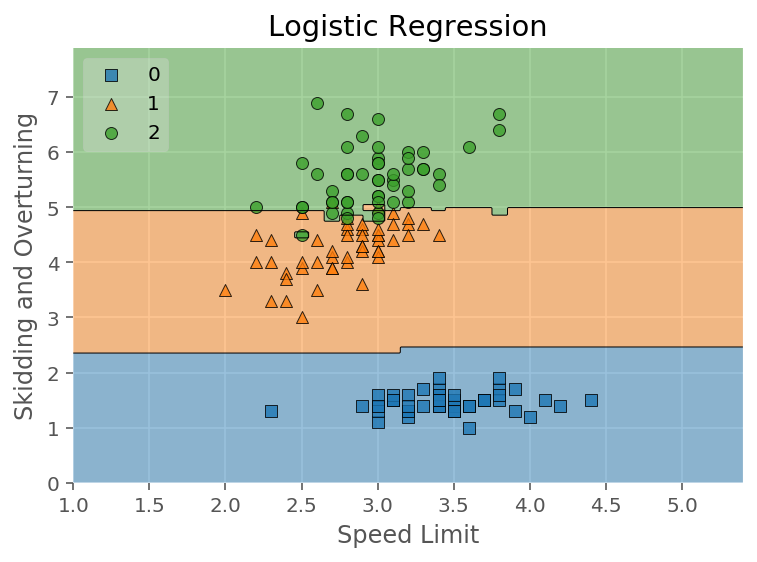

In [38]:
from mlxtend.plotting import plot_decision_regions




plot_decision_regions(X,y,clf = randomforest,legend = 2)
plt.title('Logistic Regression')
plt.xlabel('Speed Limit')
plt.ylabel('Skidding and Overturning')

plt.show()

In [39]:
Y_pred = randomforest.predict(X)
acc_decision_tree1 = round(randomforest.score(X, y_kmeans) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 0.67
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        50
           1   0.980000  0.980000  0.980000        50
           2   0.980000  0.980000  0.980000        50

    accuracy                       0.986667       150
   macro avg   0.986667  0.986667  0.986667       150
weighted avg   0.986667  0.986667  0.986667       150



Predicted,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,49,1,50
2,0,1,49,50
All,50,50,50,150


In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
sgdc= SGDClassifier(random_state=42)
sgdc.fit(X_train,y_train) # training model
pred =sgdc.predict(X_test) # we use this for evaluation
print("SGDClassifier f1_score: ",f1_score(y_test, pred, average='micro')

SGDClassifier f1_score:  0.8618121638394705


In [10]:
acc_decision_tree1 = round(sgdc.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.18
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      4111
           2   0.347541  0.005557  0.010939     38151
           3   0.862845  0.998610  0.925776    264697

    accuracy                       0.861812    306959
   macro avg   0.403462  0.334722  0.312238    306959
weighted avg   0.787243  0.861812  0.799675    306959



Predicted,1,2,3,All
Actual,,,,
1,0,32,4079,4111
2,1,212,37938,38151
3,2,366,264329,264697
All,3,610,306346,306959


Text(0, 0.5, 'Latitude')

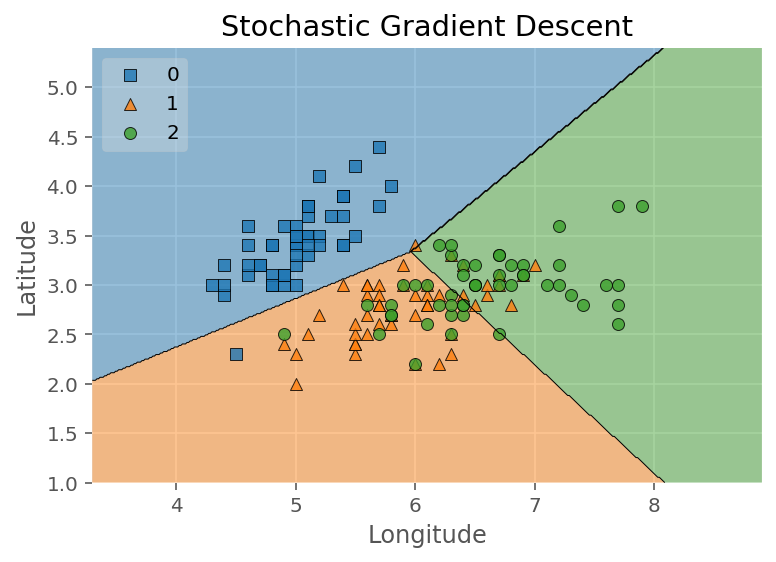

In [8]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)
classifier.fit(X, y)


plot_decision_regions(X,y,clf = classifier,legend = 2)
plt.title('Stochastic Gradient Descent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [11]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)
adaboost.fit(X_train,y_train) # training model
pred=adaboost.predict(X_test) # we use this for evaluation
print("AdaBoostClassifier f1_score: ",f1_score(y_test, pred, average='micro'))

AdaBoostClassifier f1_score:  0.8622454464602766


In [12]:
acc_decision_tree1 = round(adaboost.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.22
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      4111
           2   0.412921  0.003853  0.007635     38151
           3   0.862767  0.999358  0.926053    264697

    accuracy                       0.862245    306959
   macro avg   0.425230  0.334404  0.311229    306959
weighted avg   0.795302  0.862245  0.799503    306959



Predicted,2,3,All
Actual,,,
1,39,4072,4111
2,147,38004,38151
3,170,264527,264697
All,356,306603,306959


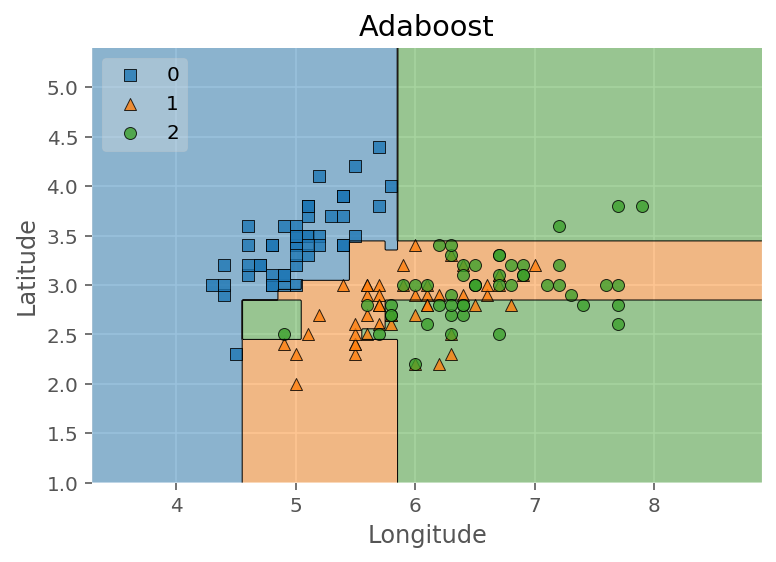

In [17]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

X = iris.data[:,[0,1]]
target = accidents['Accident_Severity']
y= iris.target
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(random_state = 0)
classifier.fit(X, y)


plot_decision_regions(X,y,clf = classifier,legend = 2)
plt.title('Adaboost')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

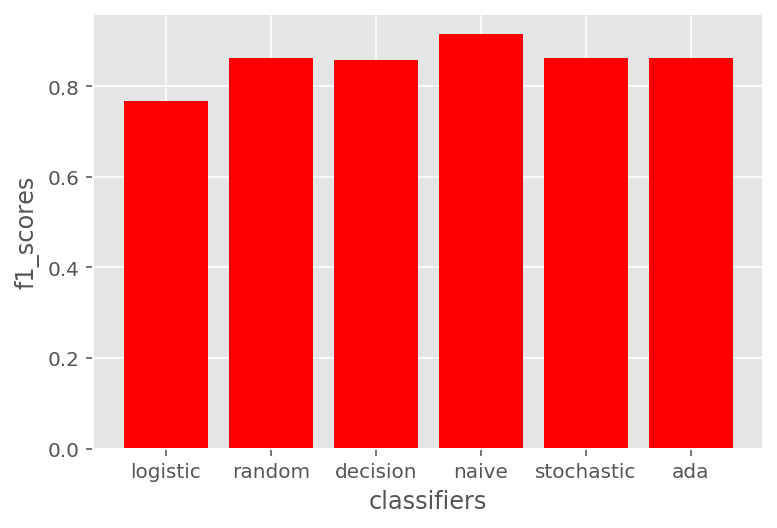

In [4]:
lab=['logistic', 'random', 'decision','naive', 'stochastic', 'ada']
f1_scores=[0.7666666666666667,0.8623073439775345, 0.858226 ,0.914714 , 0.8618121638394705,0.8622454464602766]
plt.bar(lab,f1_scores,color='red')
plt.xlabel("classifiers")
plt.ylabel("f1_scores")
plt.show()